# Projet streamlit - Partie Dataviz

## Projet Supply Chain - DSAvril23

## 1. Import des données

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from bs4 import BeautifulSoup as bs
import requests


In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1.1 Webscrapping Sephora

In [3]:
# Scrapping des données sephora

url_base = "https://fr.trustpilot.com/review/www.sephora.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 19):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Sephora')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        #etoile=donnees.find('img') renvoie, à tort, des notes vides ne pouvant pas être converties en 'int'
        #notes.append(etoile['alt'])
        #nous utilisons alors le code suivant:

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)

In [4]:
df_sephora = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_sephora['notes'] = df_sephora['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_sephora['notes'] = df_sephora['notes'].str.replace('.svg', '')

display(df_sephora.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Sephora,Amélie Mélie,2 avis,20 décembre 2023,5,Merci au service client,Trés bonne qualité on est rarement deçue seul ...,2023-12-21T22:13:08.000Z,NaN,NaN
1,Sephora,saba,15 avis,28 septembre 2023,1,nul voleur et menteur j ai acheter…,nul voleur et menteur j ai acheter un r...,2023-11-05T01:21:18.000Z,NaN,NaN
2,Sephora,M.D.,2 avis,06 décembre 2023,5,Totalement satisfaite de l'accueil et…,Totalement satisfaite de l'accueil et des cons...,2023-12-06T21:28:35.000Z,NaN,NaN
3,Sephora,dji you,10 avis,02 octobre 2023,1,Du bla bla commercial !!!,Cela fait plus de 20 ans que j'achète des parf...,2023-10-26T13:11:09.000Z,NaN,NaN
4,Sephora,MARIANNE BAILLEUL,4 avis,03 octobre 2023,1,Conseils maquillages nuls,Conseils maquillages nuls ! un mascara qui fai...,2023-10-04T13:40:17.000Z,NaN,NaN


### 1.2 Webscrapping Marionnaud

In [5]:
# Scrapping des données Marionnaud

url_base = "https://fr.trustpilot.com/review/www.marionnaud.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 100):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Marionnaud')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)

In [6]:
df_Marionnaud = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_Marionnaud['notes'] = df_Marionnaud['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_Marionnaud['notes'] = df_Marionnaud['notes'].str.replace('.svg', '')

display(df_Marionnaud.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Marionnaud,Stéphanie Pinel-Le Borgne,1 avis,18 décembre 2023,5,Bonnes expériences !,Voilà plusieurs fois que je commande sur le si...,2023-12-23T18:21:23.000Z,NaN,NaN
1,Marionnaud,Nora Bun,1 avis,23 décembre 2023,5,Un grand merci au service client…,Un grand merci au service client d'avoir tenu ...,2023-12-23T16:22:11.000Z,NaN,NaN
2,Marionnaud,Barbie,3 avis,29 octobre 2023,5,MEILLEUR SITE DE COSMÉTIQUES EN LIGNE,Merci à Marionnaud pour les ristournes importa...,2023-12-22T14:47:58.000Z,NaN,NaN
3,Marionnaud,Shogun,3 avis,16 décembre 2023,3,J’ai commandé sur internet pour 193€,J’ai commandé sur internet pour 193€. Livraiso...,2023-12-22T12:47:56.000Z,NaN,NaN
4,Marionnaud,dominique devincke,4 avis,07 décembre 2023,5,Facile de passer une commande sur ce…,"Facile de passer une commande sur ce site , un...",2023-12-23T19:51:58.000Z,NaN,NaN


### 1.3 Webscrapping Nocibé

In [7]:
# Scrapping des données Nocibé

url_base = "https://fr.trustpilot.com/review/www.nocibe.fr"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 60):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Nocibé')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)

In [8]:
df_Nocibé = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_Nocibé['notes'] = df_Nocibé['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_Nocibé['notes'] = df_Nocibé['notes'].str.replace('.svg', '')

display(df_Nocibé.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Nocibé,lmb_marion,3 avis,14 décembre 2023,5,Très bien,"J’ai commandé un parfum avec emballage-cadeau,...",2023-12-23T00:37:20.000Z,NaN,NaN
1,Nocibé,Christophe Gabrion,1 avis,22 décembre 2023,1,Nocibe Nevers Marzy Centre cle…,Nocibe Nevers Marzy Centre cle Carrefour ( 58)...,2023-12-22T16:59:53.000Z,NaN,NaN
2,Nocibé,Titou Zouille,1 avis,20 décembre 2023,1,Je suis dégoûté de ma commande,Je suis dégoûté de ma commande. J avais demand...,2023-12-21T20:28:05.000Z,NaN,NaN
3,Nocibé,MARCADIER Didier,2 avis,19 décembre 2023,1,Cheque fidélité,Suite à un achat effectué aujourd'hui en bouti...,2023-12-19T20:29:07.000Z,NaN,NaN
4,Nocibé,Maxime Sanchez,1 avis,05 décembre 2023,1,JE NE RECOMMANDE PAS DU TOUT NOCIBE,JE NE RECOMMANDE PAS DU TOUT NOCIBE ! JAI FAIS...,2023-12-21T21:42:00.000Z,NaN,NaN


### 1.4 Webscrapping My Origines 

In [9]:
# Scrapping des données My Origins

url_base = "https://fr.trustpilot.com/review/www.my-origines.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 200):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('My_origines')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)

In [10]:
df_my= pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_my['notes'] = df_my['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_my['notes'] = df_my['notes'].str.replace('.svg', '')

display(df_my.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,My_origines,Isa,1 avis,19 décembre 2023,5,Parfait,Juste parfait. Mes commandes sont toujours gén...,2023-12-26T14:24:09.000Z,NaN,NaN
1,My_origines,D Canal,1 avis,18 décembre 2023,5,"Bonjour,faire plaisir le jour J","Bonjour, Christian a reçu votre colis à la dat...",2023-12-26T16:03:37.000Z,NaN,NaN
2,My_origines,Nicole,3 avis,19 décembre 2023,5,Super satisfaite,"Navigation sur votre site très simple, Large c...",2023-12-26T15:35:46.000Z,NaN,NaN
3,My_origines,ANNA,1 avis,18 décembre 2023,5,Comme d'habitude... tout est parfait !,Cette fois encore je suis entièrement satisfai...,2023-12-26T15:36:44.000Z,NaN,NaN
4,My_origines,Inès Blanc,3 avis,19 décembre 2023,5,Trop CONTENTE !! JE RECOMMANDE VIVEMENT,Trop CONTENTE !!! J'ai offert différents parf...,2023-12-26T14:18:11.000Z,NaN,NaN


In [30]:
dataframes = [df_sephora, df_Marionnaud, df_Nocibé, df_my]
df = pd.concat(dataframes)
df.head(10)

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Sephora,Amélie Mélie,2 avis,20 décembre 2023,5,Merci au service client,Trés bonne qualité on est rarement deçue seul ...,2023-12-21T22:13:08.000Z,NaN,NaN
1,Sephora,saba,15 avis,28 septembre 2023,1,nul voleur et menteur j ai acheter…,nul voleur et menteur j ai acheter un r...,2023-11-05T01:21:18.000Z,NaN,NaN
2,Sephora,M.D.,2 avis,06 décembre 2023,5,Totalement satisfaite de l'accueil et…,Totalement satisfaite de l'accueil et des cons...,2023-12-06T21:28:35.000Z,NaN,NaN
3,Sephora,dji you,10 avis,02 octobre 2023,1,Du bla bla commercial !!!,Cela fait plus de 20 ans que j'achète des parf...,2023-10-26T13:11:09.000Z,NaN,NaN
4,Sephora,MARIANNE BAILLEUL,4 avis,03 octobre 2023,1,Conseils maquillages nuls,Conseils maquillages nuls ! un mascara qui fai...,2023-10-04T13:40:17.000Z,NaN,NaN
5,Sephora,valerie Tixier,9 avis,06 décembre 2022,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07T23:23:02.000Z,NaN,NaN
6,Sephora,Suzy B,1 avis,25 mai 2023,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26T22:28:26.000Z,NaN,NaN
7,Sephora,Nam Nam,1 avis,20 août 2020,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20T08:34:01.000Z,NaN,NaN
8,Sephora,Claire Desmedt,3 avis,30 mai 2022,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30T13:56:52.000Z,NaN,NaN
9,Sephora,Bettach,3 avis,15 février 2021,1,Très mauvaise expérience,Très mauvaise expérience. Un SAV inutile qui n...,2021-02-15T18:06:28.000Z,NaN,NaN


In [12]:
# afin de ne pas avoir à refaire tourner le webscrapping, nous extrayons un fichier .csv
# df.to_csv('Compilation webscrapping cosmetique.csv', index=False)

## 2. Analyse des données

In [3]:
# cellule à relancer lors de la prochaine ré-ouverture du notebook
df=pd.read_csv('Compilation webscrapping cosmetique.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5697 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            5697 non-null   object
 1   client             5697 non-null   object
 2   nb_avis_client     5697 non-null   object
 3   date_commande      5697 non-null   object
 4   notes              5697 non-null   object
 5   titre_commentaire  5697 non-null   object
 6   commentaire        5697 non-null   object
 7   date_commentaire   5697 non-null   object
 8   reponse_sav        2131 non-null   object
 9   date_reponse_sav   2131 non-null   object
dtypes: object(10)
memory usage: 489.6+ KB


In [32]:
# transformation du type du nombre d'avis clients

df['nb_avis_client'] = df['nb_avis_client'].str.extract('(\d+)').astype(int)

In [4]:
# transformation du type de la note

df['notes']=df['notes'].astype('int')


In [37]:
# transformation du type de la date de commande

from datetime import datetime
import locale

locale.setlocale(locale.LC_TIME, "fr_FR")
df['date_commande'] = df['date_commande'].apply(lambda x: datetime.strptime(x, '%d %B %Y'))

In [88]:
# transformation du type de la date de commentaire

df['date_commentaire'] = pd.to_datetime(df['date_commentaire'], format='%d-%m-%Y').dt.date

In [89]:
df['date_commentaire'] = pd.to_datetime(df['date_commentaire'])

In [39]:
df['date_reponse_sav'] = pd.to_datetime(df['date_reponse_sav'])

In [83]:
df['date_commentaire'] = pd.to_datetime(df['date_commentaire'])
df['date_reponse_sav'] = pd.to_datetime(df['date_reponse_sav'])

df['date_commentaire'] = df['date_commentaire'].dt.tz_localize('UTC')

df['delai_reponse_sav'] = (df['date_reponse_sav'] - df['date_commentaire']).dt.days

In [94]:
# on vérifie que les changements aient bien été effectués

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5697 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   company            5697 non-null   object             
 1   client             5697 non-null   object             
 2   nb_avis_client     5697 non-null   int32              
 3   date_commande      5697 non-null   datetime64[ns]     
 4   notes              5697 non-null   int32              
 5   titre_commentaire  5697 non-null   object             
 6   commentaire        5697 non-null   object             
 7   date_commentaire   5697 non-null   datetime64[ns]     
 8   reponse_sav        2131 non-null   object             
 9   date_reponse_sav   2131 non-null   datetime64[ns, UTC]
 10  delai_reponse_sav  2131 non-null   float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](2), float64(1), int32(2), object(5)
memory usage: 489.6+ KB


In [90]:
df.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav,delai_reponse,delai_reponse_sav
0,Sephora,Amélie Mélie,2,2023-12-20,5,Merci au service client,Trés bonne qualité on est rarement deçue seul ...,2023-12-21,NaN,NaT,NaT,NaN
1,Sephora,saba,15,2023-09-28,1,nul voleur et menteur j ai acheter…,nul voleur et menteur j ai acheter un r...,2023-11-05,NaN,NaT,NaT,NaN
2,Sephora,M.D.,2,2023-12-06,5,Totalement satisfaite de l'accueil et…,Totalement satisfaite de l'accueil et des cons...,2023-12-06,NaN,NaT,NaT,NaN
3,Sephora,dji you,10,2023-10-02,1,Du bla bla commercial !!!,Cela fait plus de 20 ans que j'achète des parf...,2023-10-26,NaN,NaT,NaT,NaN
4,Sephora,MARIANNE BAILLEUL,4,2023-10-03,1,Conseils maquillages nuls,Conseils maquillages nuls ! un mascara qui fai...,2023-10-04,NaN,NaT,NaT,NaN


## 3. Data visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


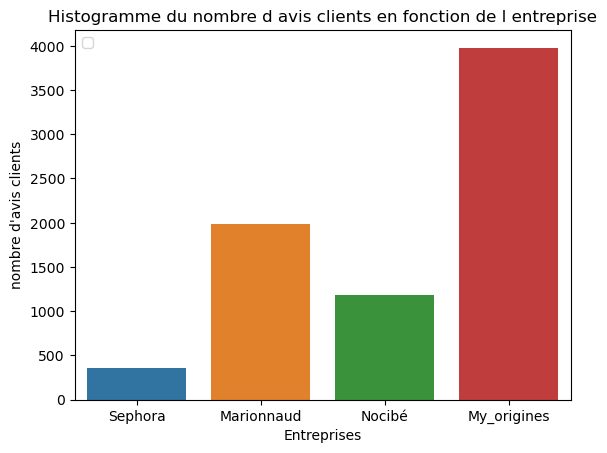

In [15]:
# Analyse de la distribution du nombre d'avis par entreprises

sns.countplot(x="company", data=df);
plt.xlabel('Entreprises')
plt.ylabel("nombre d'avis clients")
plt.legend()
plt.title('Histogramme du nombre d avis clients en fonction de l entreprise');

# dans un 1er temps, ayant scrappé le même nombre de page (contenant le même nombre de commentaires), nous avons autant
# de données pour toutes les entreprises - nous n'avons pas nécessité de normaliser nos données

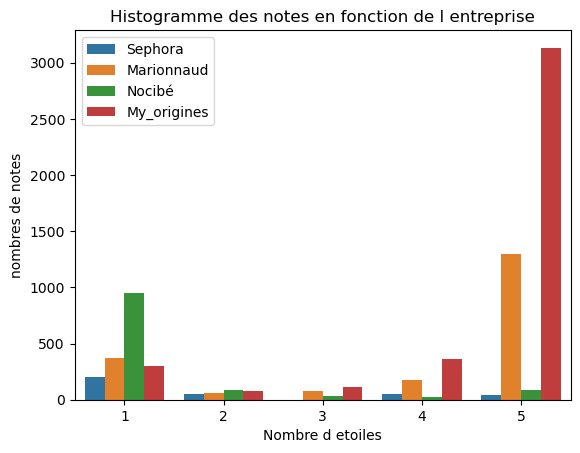

In [16]:
# Analyse de la distribution du nombre d'étoiles par entreprises

sns.countplot(x="notes", hue='company', data=df)
plt.xlabel('Nombre d etoiles')
plt.ylabel("nombres de notes")
plt.legend()
plt.title('Histogramme des notes en fonction de l entreprise');

# ce graphique nous permet de voir
# de façon générale que les clients sont extrêmes dans leurs notations et mettent soit une très bonne note (5) soit une très 
# mauvaise (1) mais il n'y a pas d'entre deux
# Sephora et Nocibé sont est assez mal nôtés, contrairement à My Origins et Marionnaud qui ont de très bonnes notes
# Il serait donc intéressant de savoir ce qui différencie ces entreprises.

"\n\nNotre 1er scrapping était réalisé sur les 20ères pages de chaque entreprise. \nSur ces 20 pages, nous obtenions des données pour sephora remontant jusqu'en 2012. \nEn revanche pour les autres entreprises (et notamment pour my origins), les données des 20ères pages étaient très récentes\nNous avons étendu notre scrapping des pages de ces sites afin de voir l'évolution des différentes variables.\nLes données de My_Origines restent malgré tout très récentes\n\nNous observons que :\n- la note moyenne mise à sephora a fortement baissé entre 2012 et 2022\n- la note moyenne mise à Nocibé semble constante entre 2016 et 2022\n- les notes moyennes de Marionnaud, My Origins et Sephora sont fortement remontées entre 2022 et 2023\n\n"

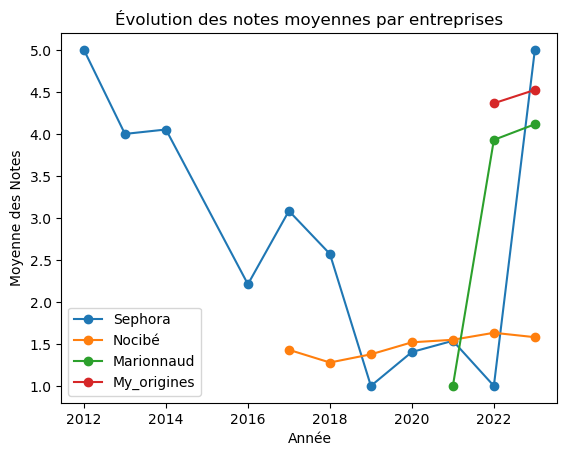

In [27]:
# évolution de la moyenne d'étoiles par an

moyennes = df.groupby(["annee_commande", "company"])["notes"].mean().reset_index()
entreprises = moyennes['company'].unique()


fig, ax = plt.subplots()

for entreprise in entreprises:
    data = moyennes[moyennes['company'] == entreprise]
    ax.plot(data['annee_commande'], data['notes'], label=entreprise, marker='o')

ax.legend()

ax.set_xlabel('Année')
ax.set_ylabel('Moyenne des Notes')
ax.set_title("Évolution des notes moyennes par entreprises");

"""

Notre 1er scrapping était réalisé sur les 20ères pages de chaque entreprise. 
Sur ces 20 pages, nous obtenions des données pour sephora remontant jusqu'en 2012. 
En revanche pour les autres entreprises (et notamment pour my origins), les données des 20ères pages étaient très récentes
Nous avons étendu notre scrapping des pages de ces sites afin de voir l'évolution des différentes variables.
Les données de My_Origines restent malgré tout très récentes

Nous observons que :
- la note moyenne mise à sephora a fortement baissé entre 2012 et 2022
- la note moyenne mise à Nocibé semble constante entre 2016 et 2022
- les notes moyennes de Marionnaud, My Origins et Sephora sont fortement remontées entre 2022 et 2023

"""


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


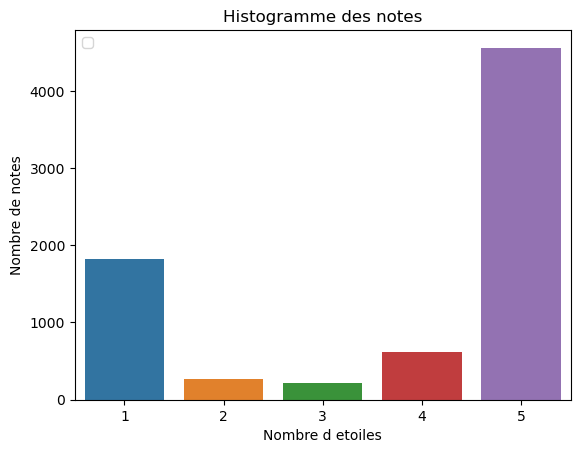

In [17]:
# Analyse de la distribution du nombre d'étoiles sans tenir compte de l entreprises

sns.countplot(x="notes", data=df)
plt.xlabel('Nombre d etoiles')
plt.ylabel("Nombre de notes")
plt.legend()
plt.title('Histogramme des notes');

In [18]:
print("Le pourcentage de répartition des étoiles est de : ", df["notes"].value_counts(normalize = True)*100)


Le pourcentage de répartition des étoiles est de :  5    60.838227
1    24.345969
4     8.182061
2     3.657234
3     2.976508
Name: notes, dtype: float64


In [28]:
df["annee_commande"]= pd.to_datetime(df['annee_commande'])

"\n\nDonnées Sephora manquantes impliquant que les années couvertes ne soient que 2021 à 2023.\nPassage des années en int ne résoud pas l'affichage.\nOn observe cependant qu'entre 2022 et 2023 :\n- que Marionnaud et My_Origins, les entreprises les mieux notées, répondent plus vite aux avis clients \n- Nocibé met plus de temps à répondre.\n\n"

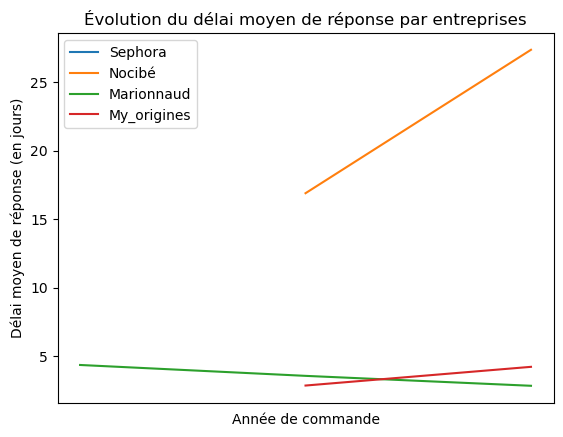

In [29]:
# On calcule l'évolution du délai moyen de réponse du sav 

df['delai_reponse'] = pd.to_timedelta(df['delai_reponse'])
df['delai_reponse'] = df['delai_reponse'].dt.total_seconds() / (24 * 3600)

moyenne_delai_par_annee = df.groupby(["annee_commande", "company"])['delai_reponse'].mean().reset_index()

entreprises = moyenne_delai_par_annee['company'].unique()

fig, ax = plt.subplots()

for entreprise in entreprises:
    data = moyenne_delai_par_annee[moyenne_delai_par_annee['company'] == entreprise]
    ax.plot(data['annee_commande'], data['delai_reponse'], label=entreprise)

ax.legend()

ax.set_xlabel('Année de commande')
ax.set_ylabel('Délai moyen de réponse (en jours)')
ax.set_title('Évolution du délai moyen de réponse par entreprises');

"""

Données Sephora manquantes impliquant que les années couvertes ne soient que 2021 à 2023.
Passage des années en int ne résoud pas l'affichage.
On observe cependant qu'entre 2022 et 2023 :
- que Marionnaud et My_Origins, les entreprises les mieux notées, répondent plus vite aux avis clients 
- Nocibé met plus de temps à répondre.

"""

In [7]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00


In [8]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words = set(stopwords.words('french'))
print(stop_words)

{'eusses', 'avons', 'même', 'étantes', 'soient', 'es', 'moi', 'ton', 'votre', 'aurai', 'en', 'avait', 'as', 'fus', 'étés', 'étants', 'que', 'du', 'aux', 'eûtes', 'à', 'sa', 'tu', 'eurent', 'seras', 'serez', 'furent', 'ses', 'l', 'soyons', 'aurons', 'qui', 'étées', 'soit', 'la', 'eues', 'mon', 'd', 'on', 'fûmes', 'fût', 'avions', 'été', 'avec', 'les', 'c', 'fussions', 'des', 'ma', 'soyez', 'aurais', 'ayons', 'fûtes', 'qu', 'sont', 'fusses', 'eux', 'étais', 'le', 'par', 'il', 'm', 'aurions', 'une', 'mes', 't', 'eûmes', 'dans', 'son', 'sera', 'étions', 'serons', 'je', 'aient', 'avaient', 'avais', 'eût', 'serais', 'avez', 'vos', 'j', 'ne', 'suis', 'seront', 'leur', 'étante', 'eussiez', 'auras', 'nos', 'ce', 'ayez', 'me', 'auriez', 'étant', 'auront', 'eussions', 'fut', 'ait', 'aura', 'vous', 'nous', 'lui', 'est', 'ayantes', 'eut', 'ta', 'y', 'eue', 'elle', 'aies', 'mais', 'ayants', 'toi', 'eusse', 'auraient', 's', 'n', 'ayante', 'eus', 'ou', 'était', 'ayant', 'te', 'êtes', 'seraient', 'de',

In [23]:
mots = ["parfum", "produit", "Nocibé","nocibe", "commande", "site", "très","plus", "c'est", "donc", "a", "car", "qu'il", "qu'elle",
        "dit", "fait", "Nocibe", "Nocibé","Sephora", "Séphora", "sephora","séphora","Marionnaud", "chez","?", "!", ".", ",", ":", ";", "-", "--", "...",'"', "'","j'ai", "faire", "dire" ]
stop_words.update(mots)

In [24]:
# Définition de fonction renvoyant la liste des commentaires négatifs ou positifs d'une entreprise donnée 

def liste_commentaires(df, company, notes):
    commentaires_filtres = df[(df["company"]==company) & (df["notes"]== notes)]
    commentaires = commentaires_filtres["commentaire"].tolist()
    text = ''.join(commentaires)
    return text

def liste_titre_commentaire(df, company, notes):
    titre_commentaire_filtres = df[(df["company"]==company) & (df["notes"]== notes)]
    titre_commentaires = titre_commentaire_filtres["titre_commentaire"].tolist()
    text = ''.join(titre_commentaires)
    return text

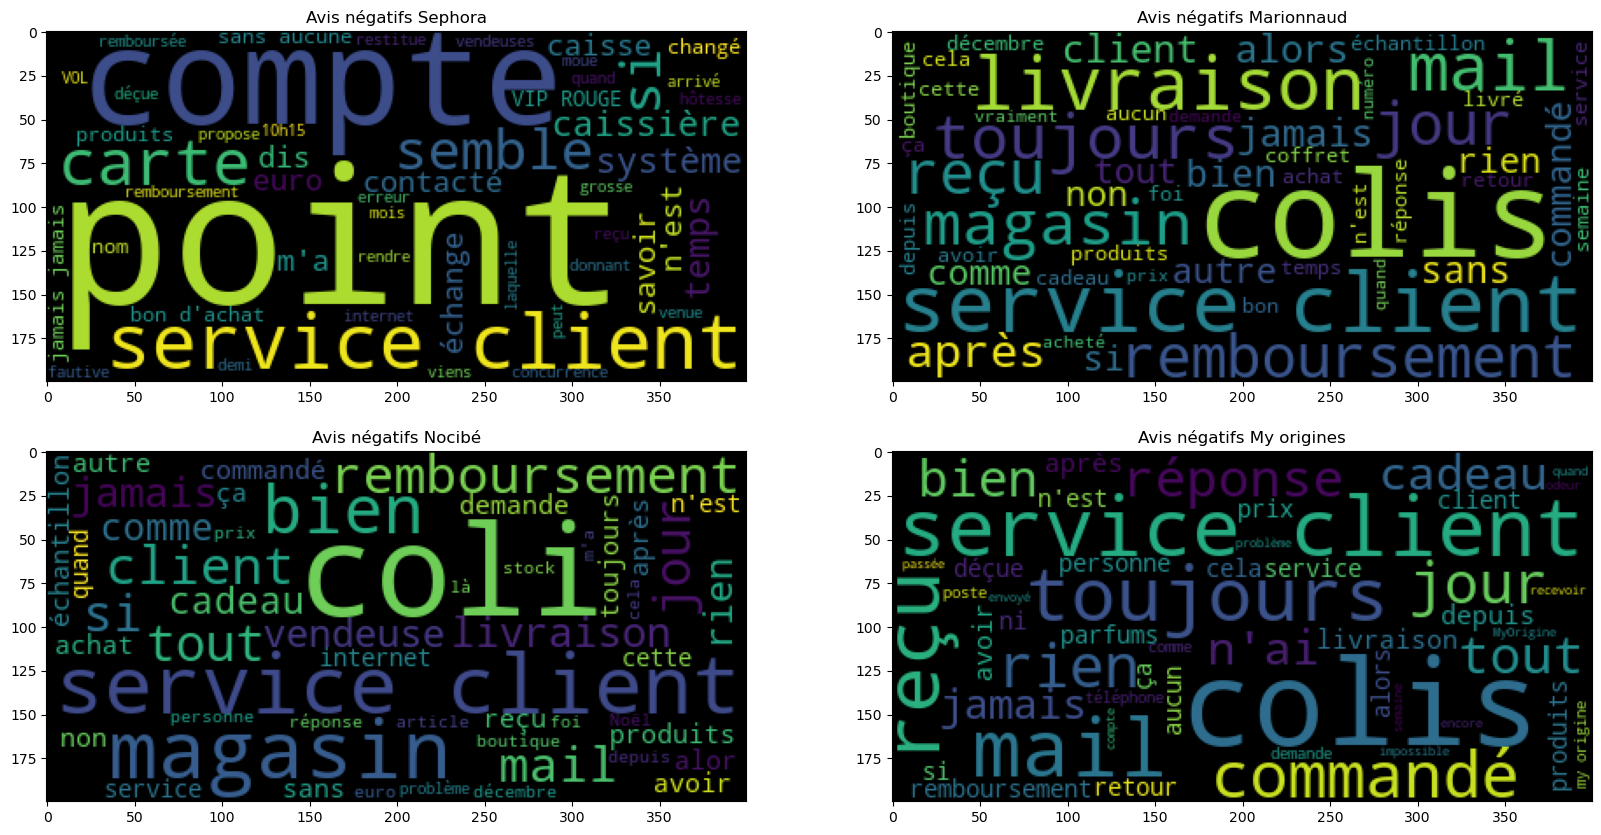

In [25]:
# Définition des wordcloud négatifs (notes égales à 1) de chacune des entreprises 

wc = WordCloud(background_color = "black", max_words = 50, stopwords = stop_words, random_state = 22)
plt.figure(figsize=(20,10))

plt.subplot(221)
wc.generate(liste_commentaires(df, "Sephora", 1))
plt.title("Avis négatifs Sephora")
plt.imshow(wc)

plt.subplot(222)
wc.generate(liste_commentaires(df, "Marionnaud", 1))
plt.title("Avis négatifs Marionnaud")
plt.imshow(wc)

plt.subplot(223)
wc.generate(liste_commentaires(df, "Nocibé", 1))
plt.title("Avis négatifs Nocibé")
plt.imshow(wc)

plt.subplot(224)
wc.generate(liste_commentaires(df, "My_origines", 1))
plt.title("Avis négatifs My origines")
plt.imshow(wc);

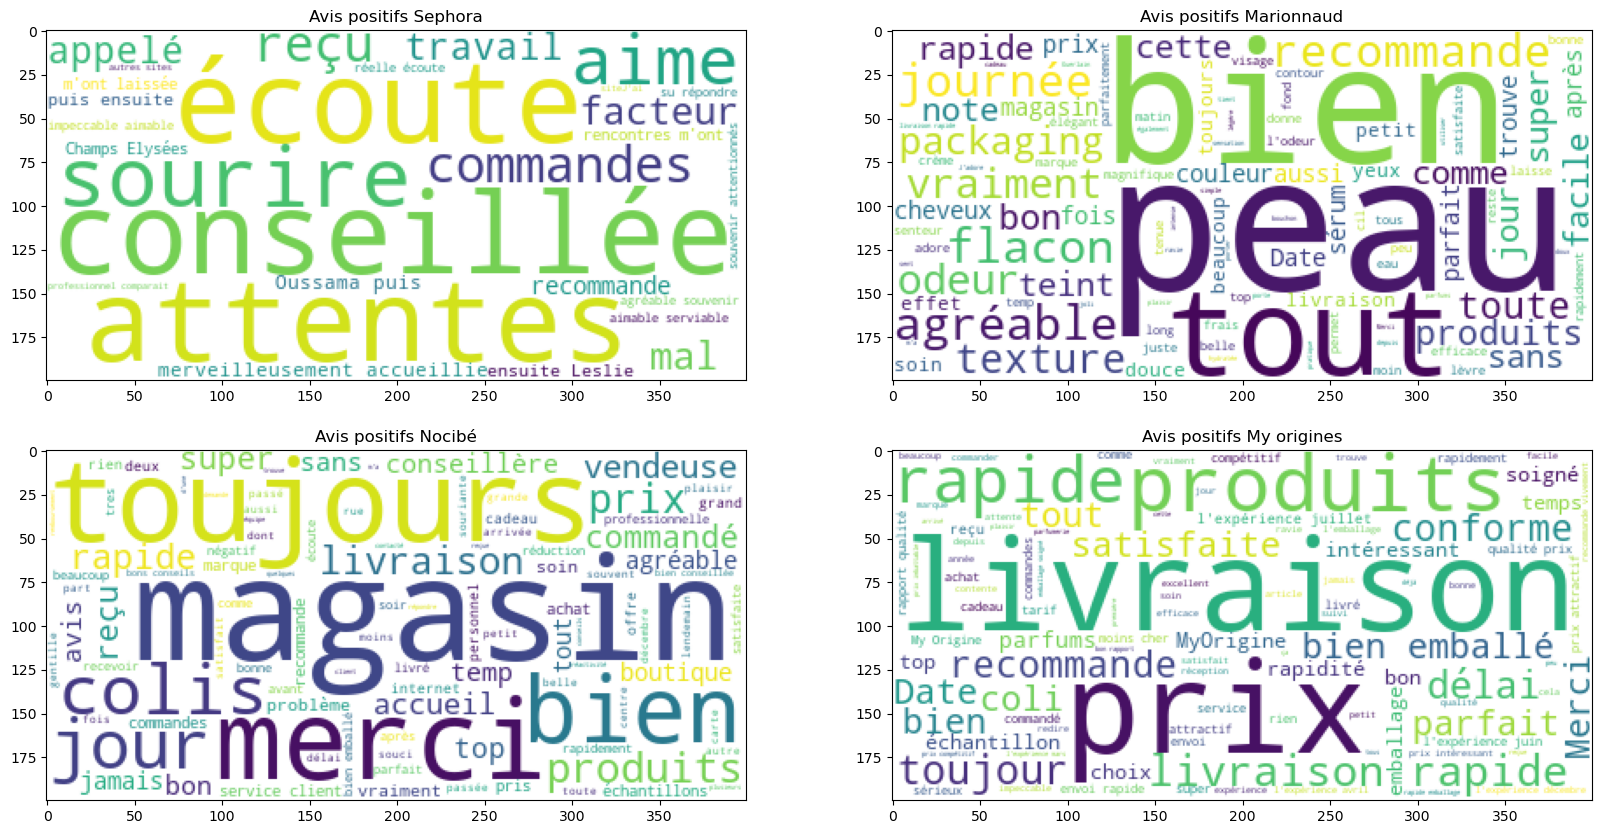

In [26]:
# Définition des wordcloud positifs (notes égales à 5) de chacune des entreprises 

wc = WordCloud(background_color = "white", max_words = 100, stopwords = stop_words, random_state = 22)
plt.figure(figsize=(20,10))

plt.subplot(221)
wc.generate(liste_commentaires(df, "Sephora", 5))
plt.title("Avis positifs Sephora")
plt.imshow(wc)

plt.subplot(222)
wc.generate(liste_commentaires(df, "Marionnaud", 5))
plt.title("Avis positifs Marionnaud")
plt.imshow(wc)

plt.subplot(223)
wc.generate(liste_commentaires(df, "Nocibé", 5))
plt.title("Avis positifs Nocibé")
plt.imshow(wc)

plt.subplot(224)
wc.generate(liste_commentaires(df, "My_origines", 5))
plt.title("Avis positifs My origines")
plt.imshow(wc);

In [31]:
import re
df_Tmauvais = df[df.notes ==1]
df_mauvais = df[df.notes==2]
df_moyen =df[df.notes ==3]
df_bon =df[df.notes ==4]
df_Tbon =df[df.notes ==5]

from collections import Counter
import seaborn as sns



Text(0.5, 1.0, '15 mots les plus fréquemment employés par les internautes laissant des mauvais commentaires')

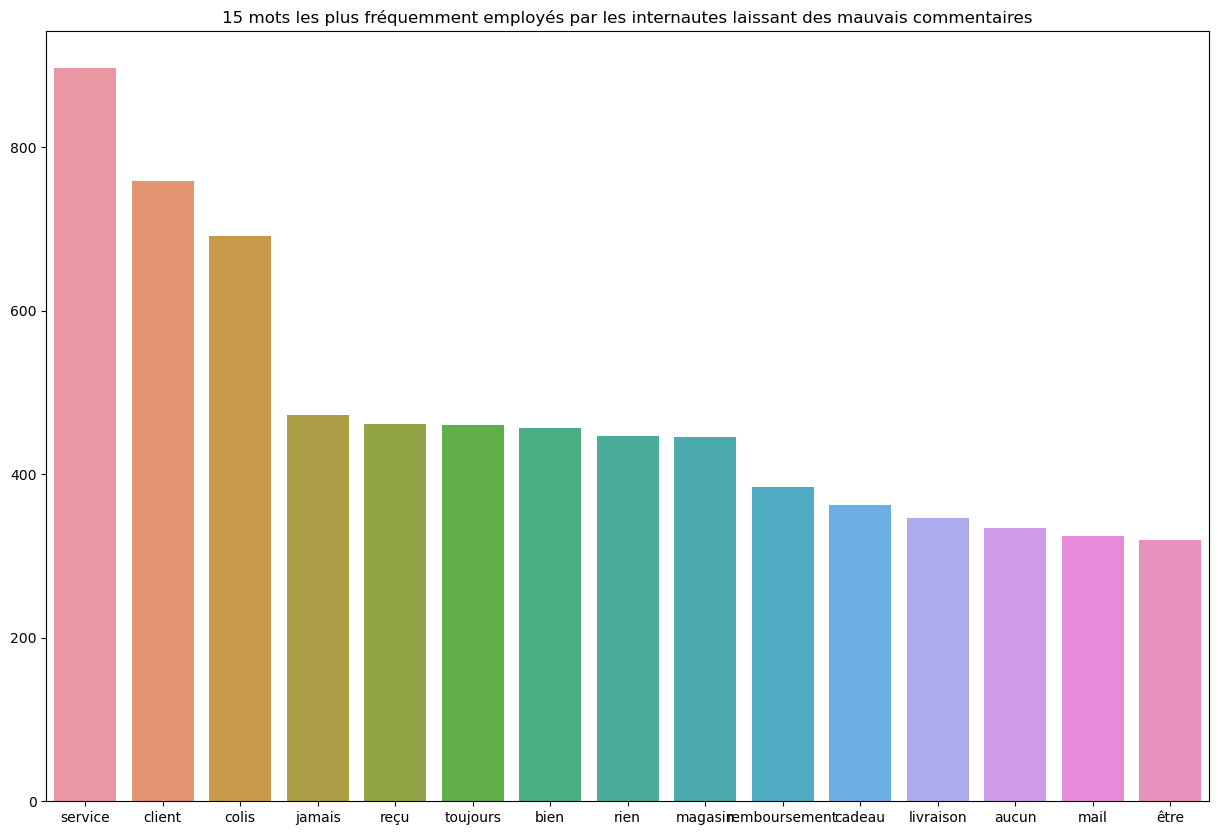

In [33]:
chaine = "".join(df_Tmauvais.commentaire)
mots = re.findall(r'\w+', chaine.lower())
mots_vide = ["nocibé", "tout", "si", "fois", "cette", "non", "après"]
stop_words.update(mots_vide)

mots_filtres = [mot for mot in mots if mot not in stop_words]
compteurs_mots = Counter(mots_filtres)

mots = [m[0] for m in compteurs_mots.most_common(15)]
freq = [m[1] for m in compteurs_mots.most_common(15)]

plt.figure(figsize= (15,10))
sns.barplot(x=mots, y=freq)
plt.title('15 mots les plus fréquemment employés par les internautes laissant des mauvais commentaires')

Text(0.5, 1.0, '15 mots les plus fréquemment employés par les internautes laissant de très bons commentaires')

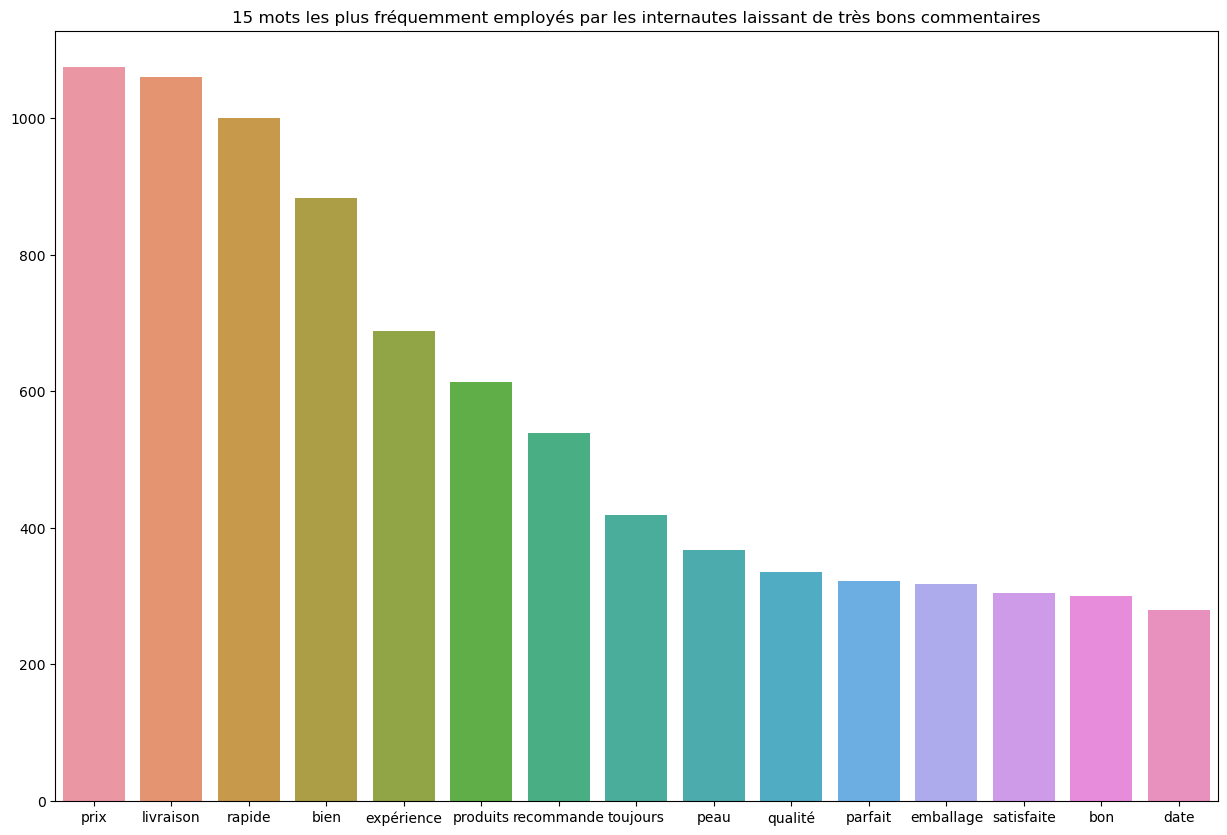

In [34]:
chaine = "".join(df_Tbon.commentaire)
mots = re.findall(r'\w+', chaine.lower())
mots_vide = ["nocibé", "tout", "si", "fois", "cette", "non", "après"]
stop_words.update(mots_vide)

mots_filtres = [mot for mot in mots if mot not in stop_words]
compteurs_mots = Counter(mots_filtres)

mots = [m[0] for m in compteurs_mots.most_common(15)]
freq = [m[1] for m in compteurs_mots.most_common(15)]

plt.figure(figsize= (15,10))
sns.barplot(x=mots, y=freq)
plt.title('15 mots les plus fréquemment employés par les internautes laissant de très bons commentaires')

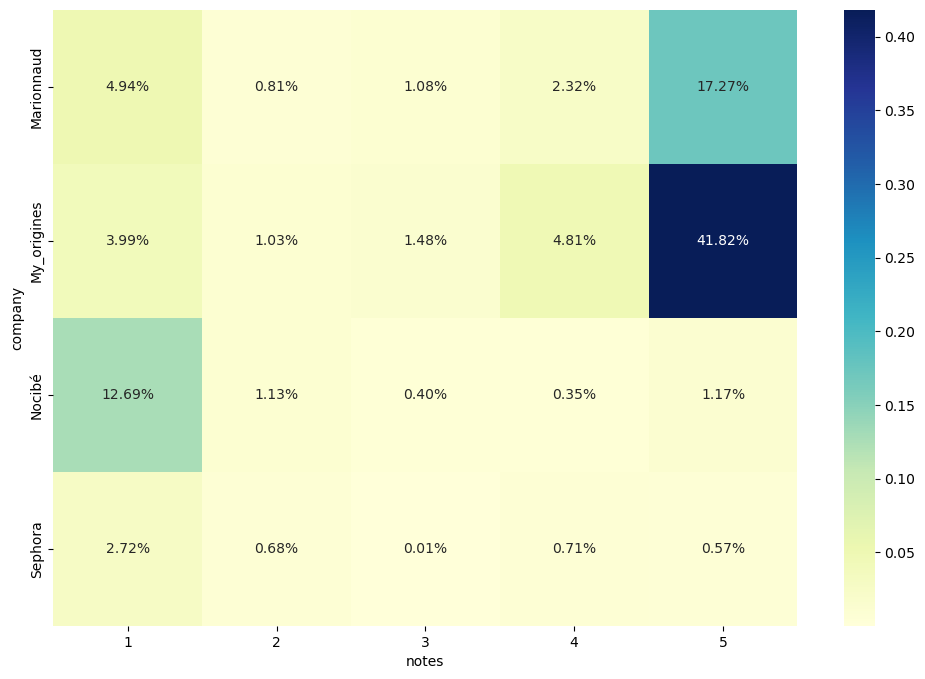

In [40]:
df["commentaire"]=df["commentaire"].fillna("")
resultats = df.groupby(["company", "notes"])["commentaire"].apply(lambda x:(x!='').sum()/len(df["commentaire"])).reset_index(name="pourcentage_commentaire")
plt.figure(figsize=(12,8))
sns.heatmap(resultats.pivot("company", "notes","pourcentage_commentaire"), annot =True, cmap = "YlGnBu",fmt=".2%")
plt.show()



In [95]:
# afin de ne pas avoir à refaire tourner le webscrapping, nous extrayons un fichier .csv
# df.to_csv('Compilation webscrapping cosmetique.csv', index=False)